### Goal
1. Acquire two appropriate datasets from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/)  and provide an exploratory analysis of its content:

 Dataset requirements:
 
 - at least five numerical attributes attributes
 - at least 1000 instances

2. Subtasks:
    
 - scatter plot of EACH attribute pair (matrix of plots), on diagonal a histogram of given attribute is expected 
 - scatter plot of each attribute pair with histograms on axes (write a function that generates plot for given attributes pair) 
 - correlation (for EACH attribute pair, if appropriate)
 - covariances (for EACH attribute pair, if appropriate)

3. Elaborate on results.

### Imports

In [3]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd

from matplotlib import animation, rc
from IPython.display import HTML

In [5]:
#PREPARE DATASETS
def load_and_preprocess_air_quality_dataset():
    data = pd.read_csv("air_quality.csv",sep=';')
    data=data.drop(['Unnamed: 15','Unnamed: 16','NMHC(GT)','NO2(GT)'],axis=1)
    data['T']=data['T'].apply(lambda x: float(x.replace(',','.')))
    data['Date'] = data['Date'].apply(lambda x: int(str(x)[3:5])) #month extraction
    data['Time'] = data['Time'].apply(lambda x: int(str(x)[0:2])) #hour extraction
    return data

def load_concrete_dataset():
    data = pd.read_excel("concrete.xls")
    return data

air_qual=load_and_preprocess_air_quality_dataset()
concrete=load_concrete_dataset()

In [6]:
def scatter_plot(dataset):
    sns.pairplot(dataset)
    pass

def scatter_pair_plot(dataset,attribute_1,attribute_2):
    try:
        k = sns.jointplot(x=attribute_1, y=attribute_2, data=dataset)
    except ValueError:
        print ('Wrong attribute/s name/s!!!')
    pass

def plot_correlation(data):
    fig, ax = plt.subplots()
    ax.matshow(data.corr())
    for (i, j), z in np.ndenumerate(data.corr()):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
def plot_covariance(data):
    fig, ax = plt.subplots()
    ax.matshow(data.cov(),aspect="auto")
    for (i, j), z in np.ndenumerate(data.cov()):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    fig.tight_layout()
        
def count_covariance(data,attr1,attr2):
    attr1,attr2=data[attr1],data[attr2]
    a1_mean = np.mean(attr1)
    a2_mean = np.mean(attr2)
    sum = 0
    for i in range(0, len(attr1)):
        sum += ((attr1[i] - a1_mean) * (attr2[i] - a2_mean))
    return sum/(len(attr1)-1)

def count_correlation(data,attr1,attr2):
    covariance=count_covariance(data,attr1,attr2)
    attr1,attr2=data[attr1],data[attr2]
    a1_std=np.std(attr1)
    a2_std=np.std(attr2)
    return covariance/(a1_std*a2_std)

### AIR-QUALITY DATASET ANALYSIS

AIR-QUALITY DATASET ANALYSIS
8.515401785719789
0.2829308316158064
1.000111247079764


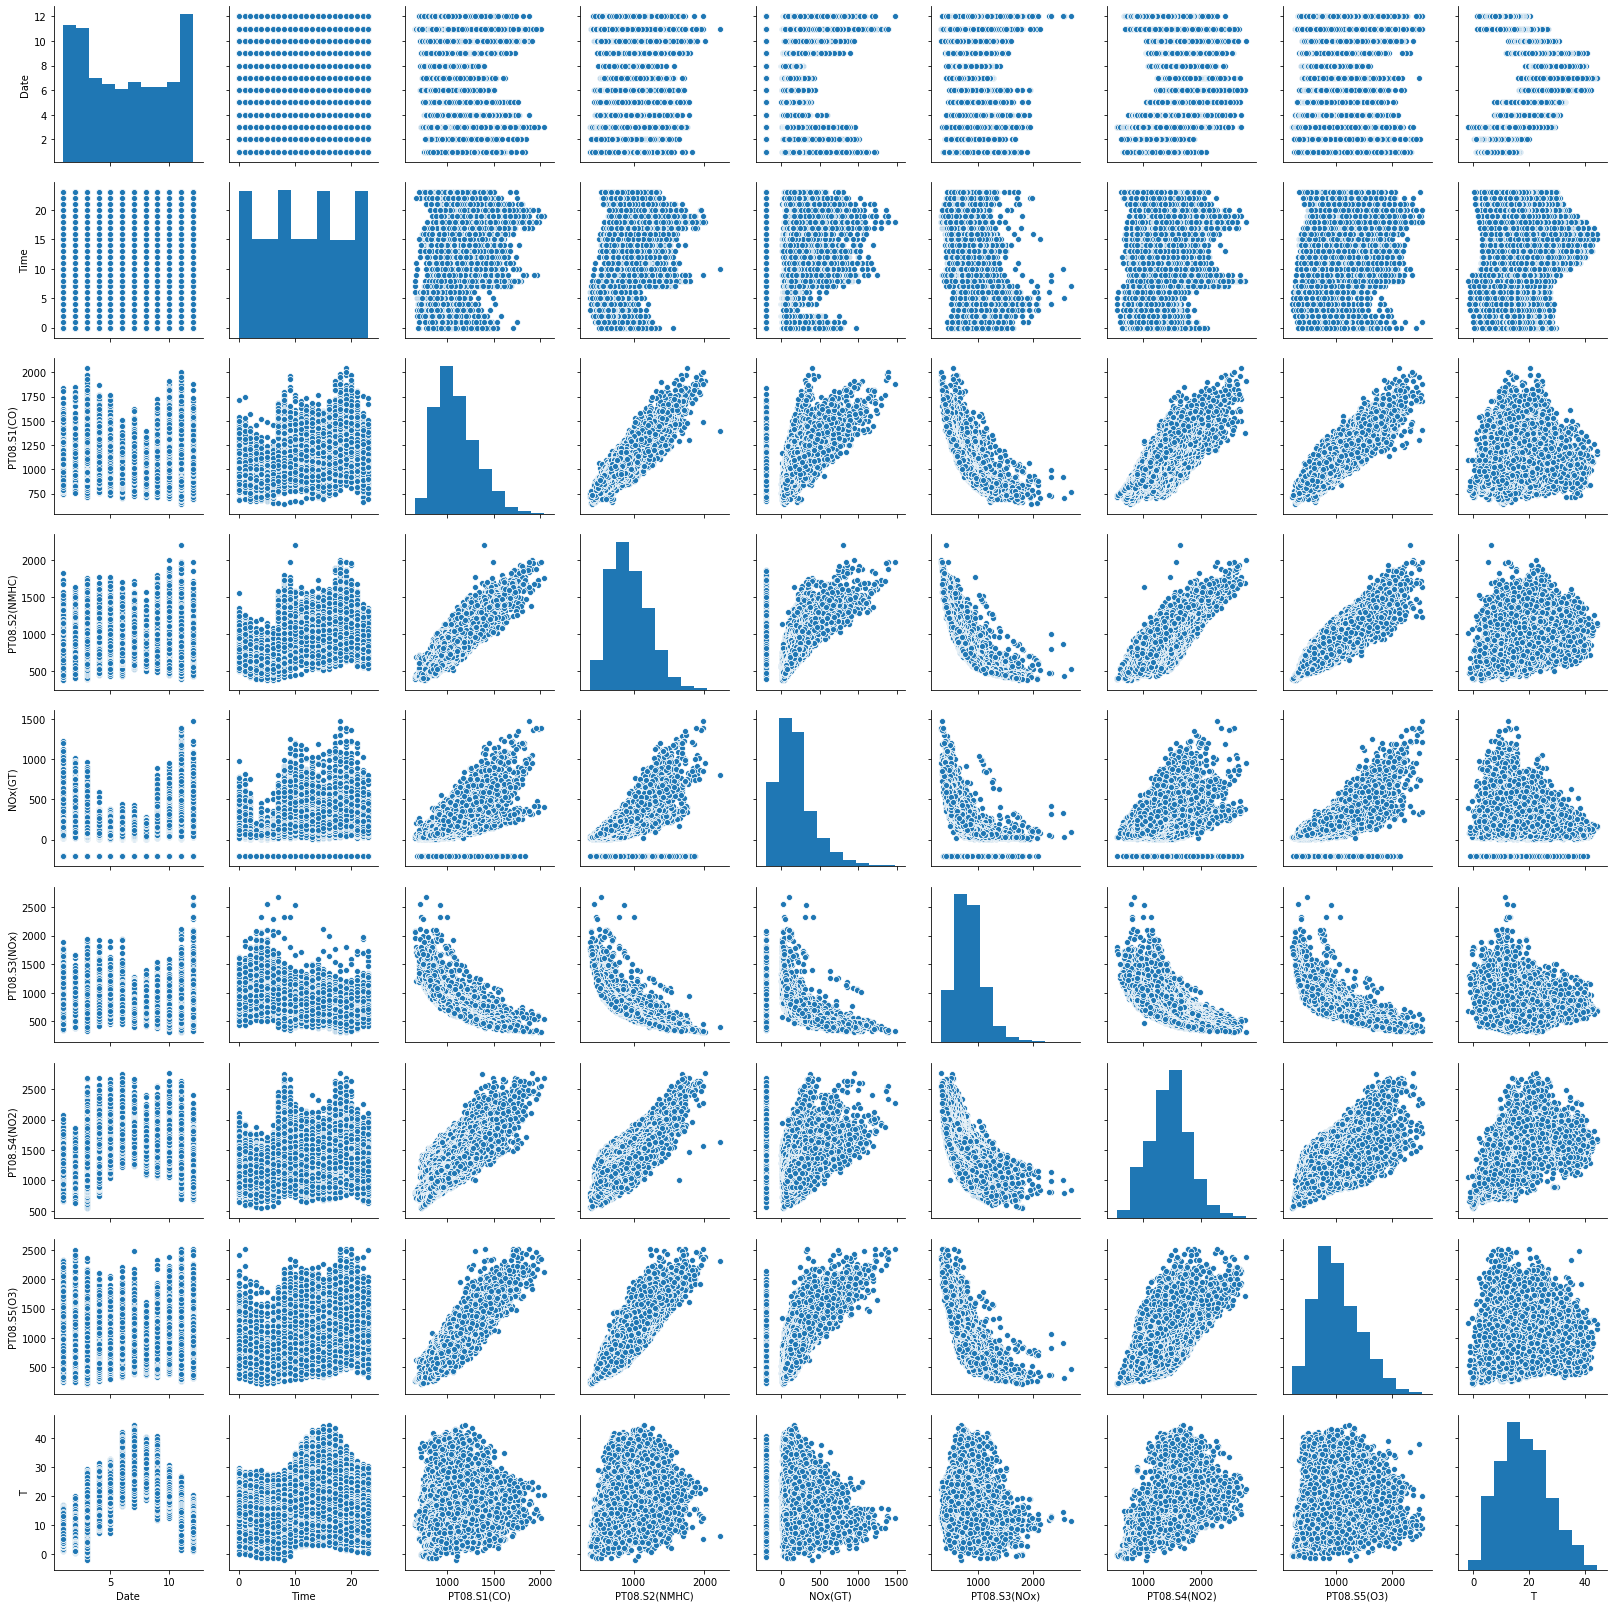

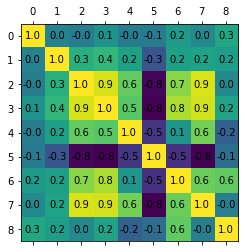

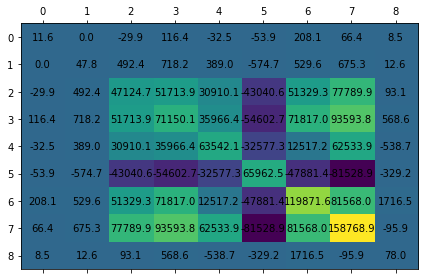

In [7]:
scatter_plot(air_qual)
plot_correlation(air_qual)
plot_covariance(air_qual)
print(count_covariance(air_qual,'Date','T'))
print(count_correlation(air_qual,'Date','T'))
print(count_correlation(air_qual,'Date','Date'))

1. A device measuring nitrogen oxides often goes wrong (-200 value is bending characteristics)
2. You can see that the air pollution by exhaust components is related to the hours of the biggest traffic in the morning - people go to work, in the afternoon they return home from work

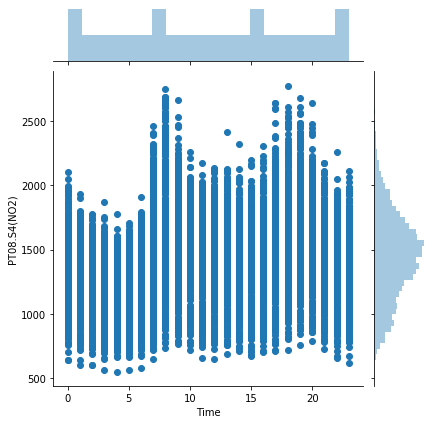

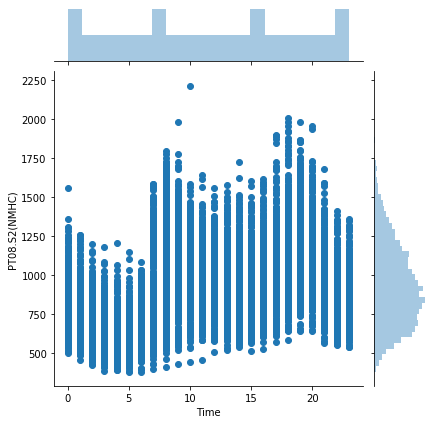

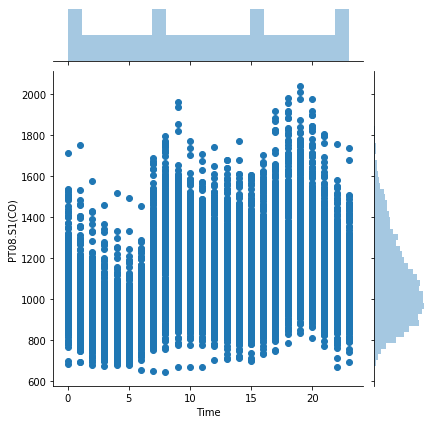

In [8]:
scatter_pair_plot(air_qual,'Time','PT08.S4(NO2)')
scatter_pair_plot(air_qual,'Time','PT08.S2(NMHC)')
scatter_pair_plot(air_qual,'Time','PT08.S1(CO)')

3. In summer months, there is less carbon monoxide air pollution, similarly when there is frost.  The greatest air pollution occurs in early spring and late autumn.

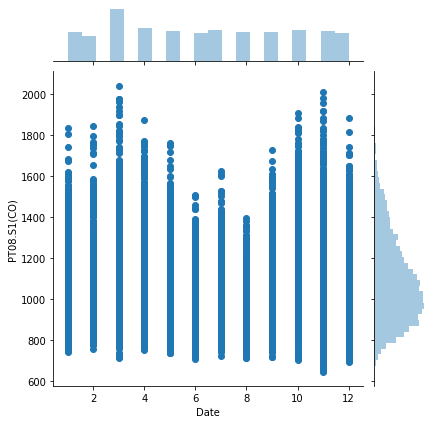

In [9]:
scatter_pair_plot(air_qual,'Date','PT08.S1(CO)')

4. Characteristics apply to countries with temperate climate - warm summer, cool winter.

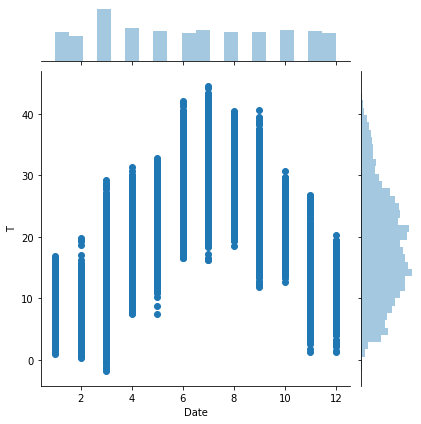

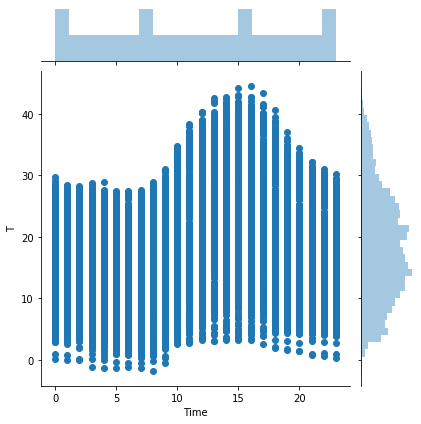

In [10]:
scatter_pair_plot(air_qual,'Date','T')
scatter_pair_plot(air_qual,'Time','T')

5. Pollution with carbon monoxide and non-metallic hydrocarbons is strongly correlated with each other. Probably in both cases the source of pollution is car exhaust.

0.8931906236997549


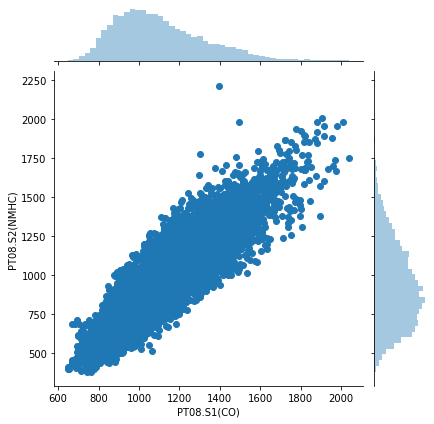

In [11]:
scatter_pair_plot(air_qual,'PT08.S1(CO)','PT08.S2(NMHC)')
print(count_correlation(air_qual,'PT08.S1(CO)','PT08.S2(NMHC)'))

### CONCRETE dataset analysis

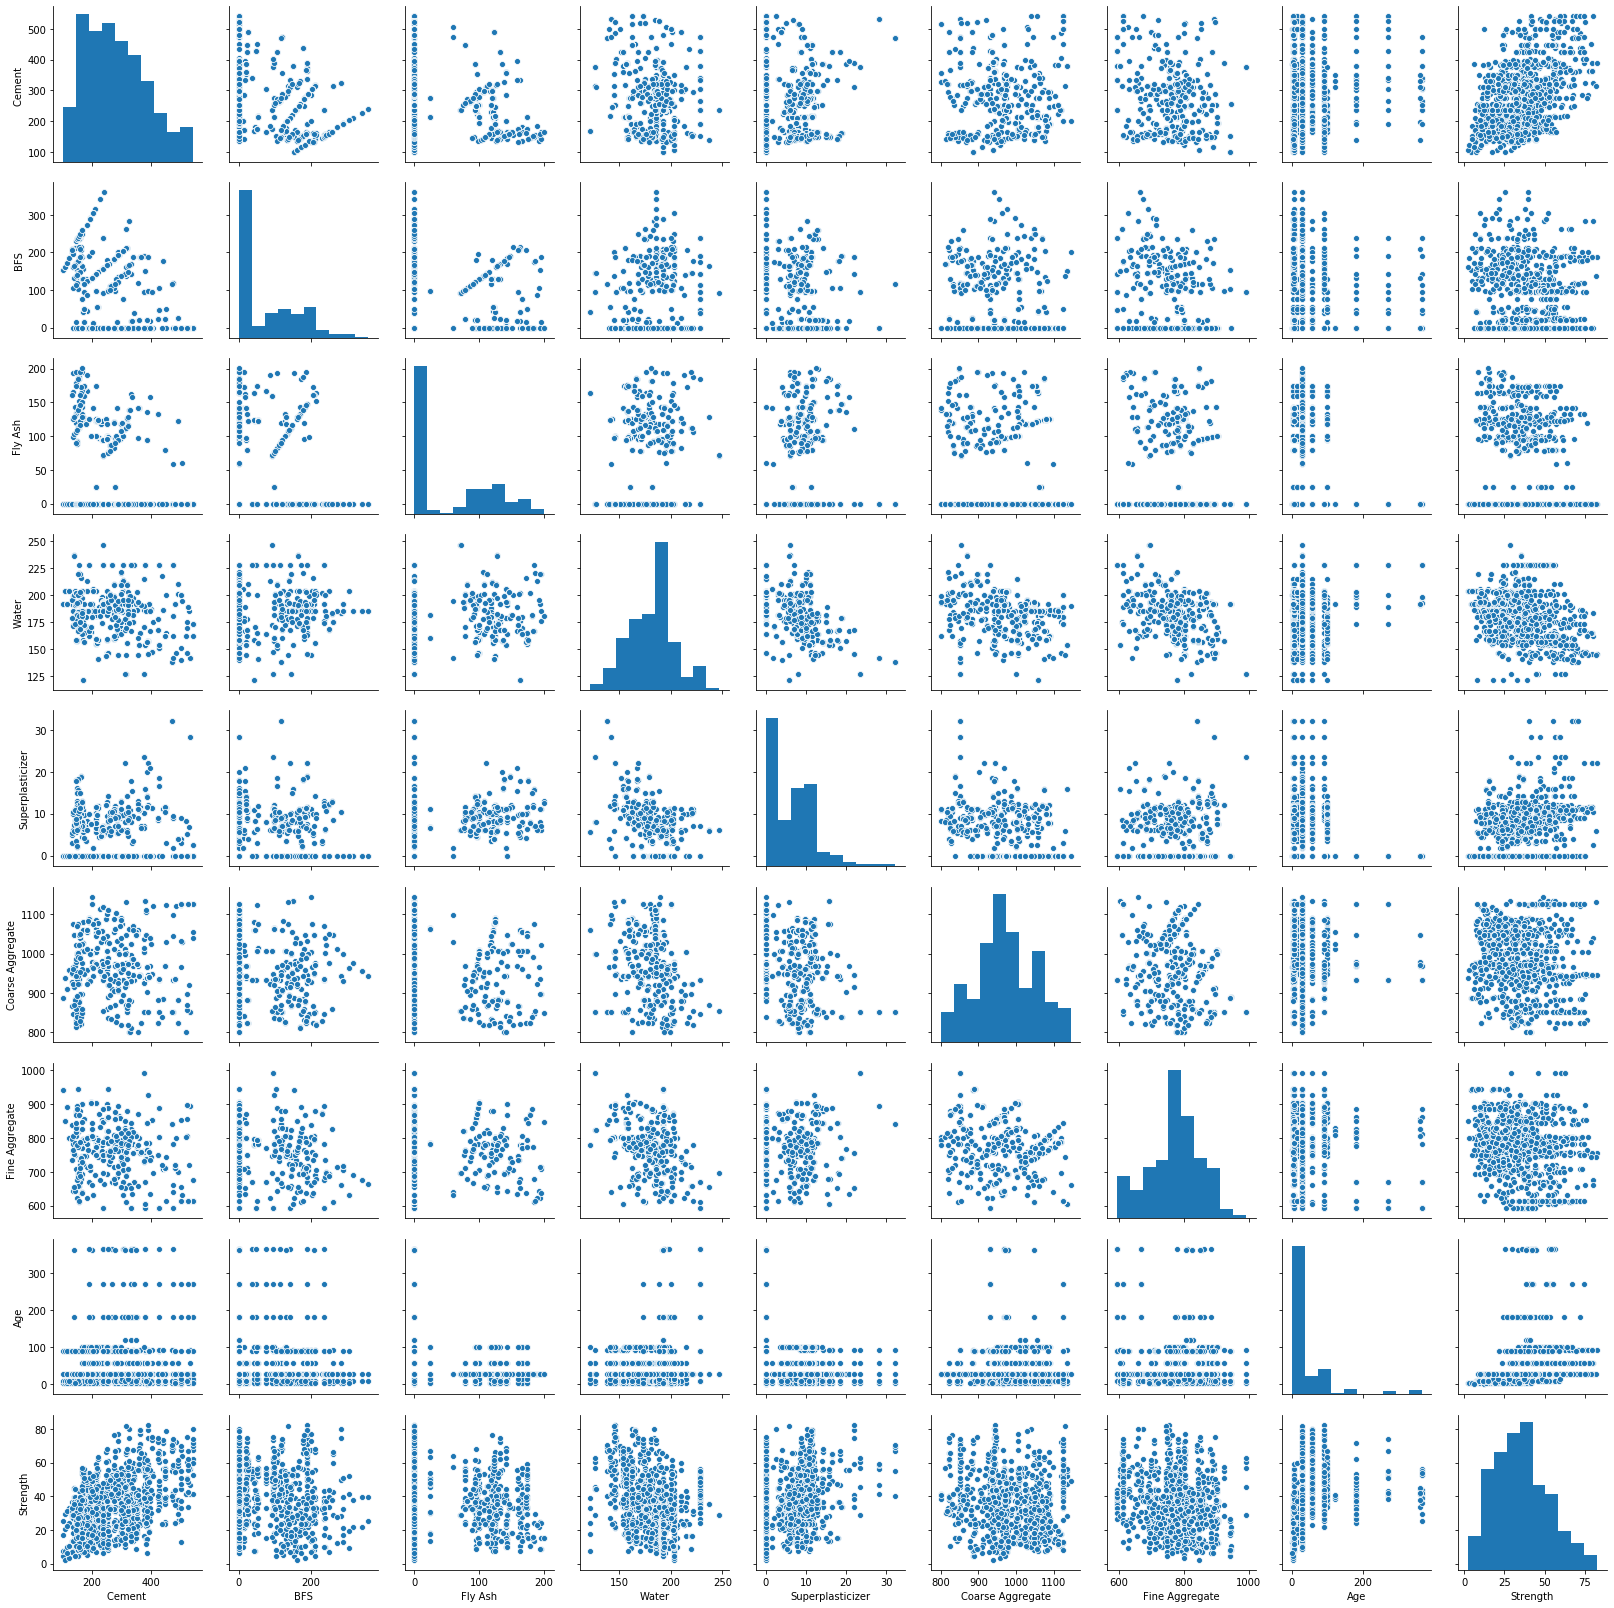

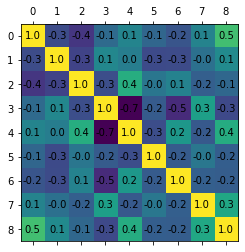

In [12]:
scatter_plot(concrete)
plot_correlation(concrete)

### Outcomes :
- It is obvious that individual components do not depend on each other
- The strength of concrete depends on the mixture of ingredients, not on the amount of each of them separately
- The exception seems to be cement - the more cement, the stronger the concrete